In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('teleCust1000t.csv')

In [3]:
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


In [4]:
df['custcat'].value_counts()

3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

In [5]:
df.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

In [6]:
X=df.drop('custcat',axis=1).values
y=df['custcat'].values

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
scaler=StandardScaler()

In [9]:
scaled_data=scaler.fit_transform(X)

In [10]:
scaled_data

array([[-0.02696767, -1.055125  ,  0.18450456, ..., -0.22207644,
        -1.03459817, -0.23065004],
       [ 1.19883553, -1.14880563, -0.69181243, ..., -0.22207644,
        -1.03459817,  2.55666158],
       [ 1.19883553,  1.52109247,  0.82182601, ..., -0.22207644,
         0.96655883, -0.23065004],
       ...,
       [ 1.19883553,  1.47425216,  1.37948227, ..., -0.22207644,
         0.96655883, -0.92747794],
       [ 1.19883553,  1.61477311,  0.58283046, ..., -0.22207644,
         0.96655883, -0.92747794],
       [ 1.19883553,  0.67796676, -0.45281689, ..., -0.22207644,
         0.96655883,  0.46617787]])

In [11]:
df.columns[:-1]

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside'],
      dtype='object')

In [12]:
df_feat=pd.DataFrame(scaled_data,columns=df.columns[:-1])

In [13]:
df_feat.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside
0,-0.026968,-1.055125,0.184505,1.010051,-0.253034,-0.126506,1.087753,-0.594123,-0.222076,-1.034598,-0.230650
1,1.198836,-1.148806,-0.691812,1.010051,-0.451415,0.546450,1.906227,-0.594123,-0.222076,-1.034598,2.556662
2,1.198836,1.521092,0.821826,1.010051,1.234819,0.359517,-1.367671,1.787528,-0.222076,0.966559,-0.230650
3,-0.026968,-0.118319,-0.691812,-0.990050,0.044536,-0.416251,-0.549196,-1.090300,-0.222076,0.966559,-0.927478
4,-0.026968,-0.586722,-0.930808,1.010051,-0.253034,-0.444291,-1.367671,-0.891829,-0.222076,-1.034598,1.163006


In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [16]:
from sklearn.neighbors import KNeighborsClassifier

In [21]:
errorrate=[]

for i in range(1,41):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred=knn.predict(X_test)
    
    errorrate.append(np.mean(pred!=y_test))

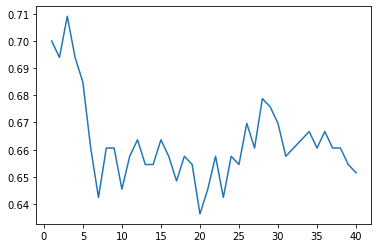

In [22]:
plt.plot(range(1,41),errorrate)

In [23]:
kn=KNeighborsClassifier(n_neighbors=9)

In [24]:
kn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='uniform')

In [25]:
predict=kn.predict(X_test)

In [19]:
from sklearn.metrics import confusion_matrix,classification_report

In [53]:
print(classification_report(y_test,predict))
print('hi')
print(confusion_matrix(y_test,predict))

              precision    recall  f1-score   support

           1       0.37      0.51      0.43        91
           2       0.29      0.23      0.26        75
           3       0.36      0.41      0.38        88
           4       0.28      0.17      0.21        76

    accuracy                           0.34       330
   macro avg       0.33      0.33      0.32       330
weighted avg       0.33      0.34      0.33       330

hi
[[46 15 19 11]
 [20 17 27 11]
 [27 14 36 11]
 [32 12 19 13]]


In [18]:
from sklearn.metrics import accuracy_score

In [48]:
print(accuracy_score(y_test,predict))

0.3393939393939394


In [17]:
%Accuracy

UsageError: Line magic function `%Accuracy` not found.


In [35]:
ks=10
mean_a=np.zeros((ks-1))
std_a=np.zeros((ks-1))
COnfmatrix=[]
for x in range(1,ks):
    kn=KNeighborsClassifier(n_neighbors=x).fit(X_train,y_train)
    pred=kn.predict(X_test)
    
    mean_a[x-1]=accuracy_score(y_test,pred)
    
    std_a[x-1]=np.std(pred==y_test)/np.sqrt(pred.shape[0])
    

In [28]:
mean_a

array([0.3       , 0.30606061, 0.29090909, 0.30606061, 0.31515152,
       0.33939394, 0.35757576, 0.33939394, 0.33939394])

In [29]:
mean_a.max()

0.3575757575757576

In [30]:
mean_a.argmax()+1

7

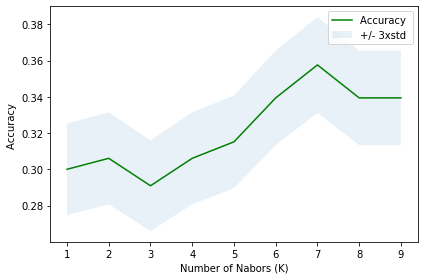

In [33]:
plt.plot(range(1,ks),mean_a,'g')
plt.fill_between(range(1,ks),mean_a - 1 * std_a,mean_a + 1 * std_a, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [47]:
ksp=40
mean_acc=np.zeros(ksp-1)
std_acc=np.zeros(ksp-1)

for n in range(1,ksp):
    k=KNeighborsClassifier(n_neighbors=n).fit(X_train,y_train)
    p=k.predict(X_test)
    mean_acc[n-1]=accuracy_score(y_test,p)
    std_acc[n-1]=np.std(p==y_test)/np.sqrt(p.shape[0])
    

In [48]:
mean_acc

array([0.3       , 0.30606061, 0.29090909, 0.30606061, 0.31515152,
       0.33939394, 0.35757576, 0.33939394, 0.33939394, 0.35454545,
       0.34242424, 0.33636364, 0.34545455, 0.34545455, 0.33636364,
       0.34242424, 0.35151515, 0.34242424, 0.34545455, 0.36363636,
       0.35454545, 0.34242424, 0.35757576, 0.34242424, 0.34545455,
       0.33030303, 0.33939394, 0.32121212, 0.32424242, 0.33030303,
       0.34242424, 0.33939394, 0.33636364, 0.33333333, 0.33939394,
       0.33333333, 0.33939394, 0.33939394, 0.34545455])

In [49]:
mean_acc.max()

0.36363636363636365

In [50]:
mean_acc.argmax()+1

20

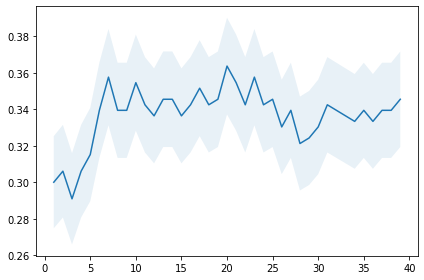

In [54]:
plt.plot(range(1,ksp),mean_acc)
plt.fill_between(range(1,ksp),mean_acc-1*std_acc,mean_acc+1*std_acc,alpha=0.1)
plt.tight_layout()
plt.show()